# Data Description:
The data at hand contains medical costs of people characterized by certain attributes.
# Domain: Healthcare

# Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

# Attribute Information:
age : age of primary beneficiary

sex : insurance contractor gender, female, male

bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children : Number of children covered by health insurance / Number of dependents

smoker : Smoking

region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges : Individual medical costs billed by health insurance

# 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the data as a data frame

In [2]:
# Read data
insurance_df = pd.read_csv("insurance.csv")

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform basic EDA which should include the following and print out your insights at every step.

# a. Shape of the data

In [4]:
insurance_df.shape

(1338, 7)

# b. Data type of each attribute

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


# c. Checking the presence of missing values

In [6]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# d. 5 point summary of numerical attributes

In [8]:
# Select all numerical attributes
numericalAttr = insurance_df.select_dtypes(exclude='object')
numericalAttr.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
# Print mean of all numberical attributes
for col in numericalAttr.columns:
    print("Mean of {}: {}".format(col, insurance_df[col].mean()))

Mean of age: 39.20702541106129
Mean of bmi: 30.663396860986538
Mean of children: 1.0949177877429
Mean of charges: 13270.422265141257


In [10]:
# Print Variance of all numberical attributes
for col in numericalAttr.columns:
    print("Variance of {}: {}".format(col, insurance_df[col].var()))

Variance of age: 197.40138665754424
Variance of bmi: 37.187883609773266
Variance of children: 1.4532127456668944
Variance of charges: 146652372.1528548


In [11]:
# Check min and max value of all numberical attributes
for col in numericalAttr.columns:
    print("{} :- MIN Value: {} and MAX Value: {}".format(col, insurance_df[col].min(), insurance_df[col].max()))

age :- MIN Value: 18 and MAX Value: 64
bmi :- MIN Value: 15.96 and MAX Value: 53.13
children :- MIN Value: 0 and MAX Value: 5
charges :- MIN Value: 1121.8739 and MAX Value: 63770.42801


In [12]:
#Find unique value all attributes, and check that all values are within expected range.
for col in numericalAttr.columns:
    print("Unique values of {}: {}".format(col,insurance_df[col].unique()))
    print("\n")

Unique values of age: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]


Unique values of bmi: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   

# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247BE8D9F60>,
      dtype=object)

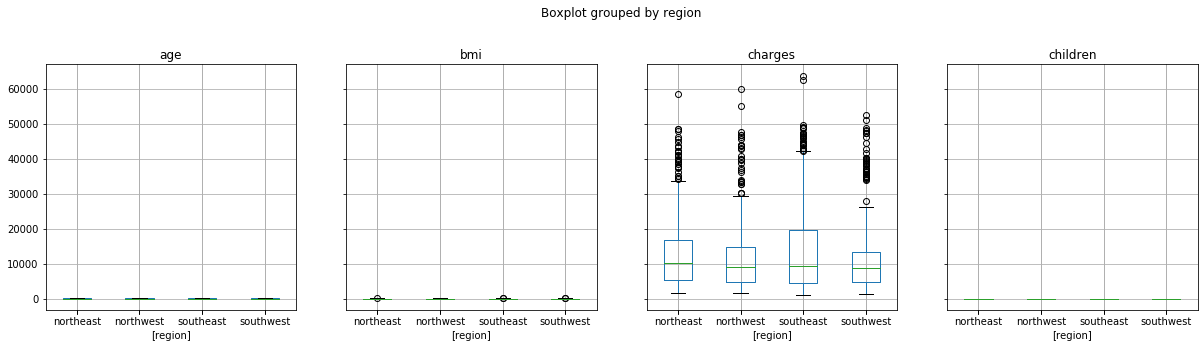

In [13]:
insurance_df.boxplot(by="region", layout=(2,4), figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247BF3ED9E8>,
      dtype=object)

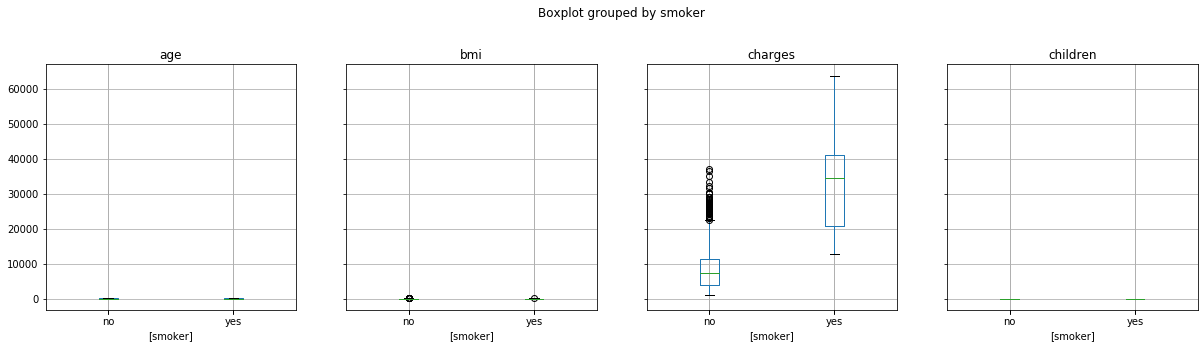

In [14]:
insurance_df.boxplot(by="smoker", layout=(2,4), figsize=(20,10))

## Check data distribution of "bmi", "age" and "charges" with respect to catorical variable "smoker"

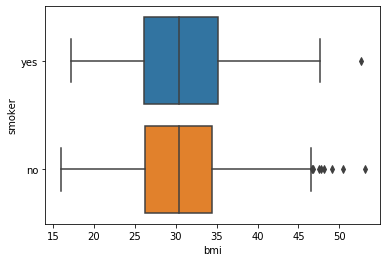

In [15]:
sns.boxplot(x=insurance_df["bmi"],y=insurance_df["smoker"])

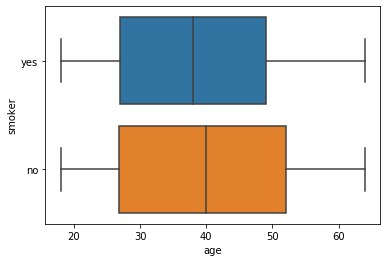

In [16]:
sns.boxplot(x=insurance_df["age"],y=insurance_df["smoker"])

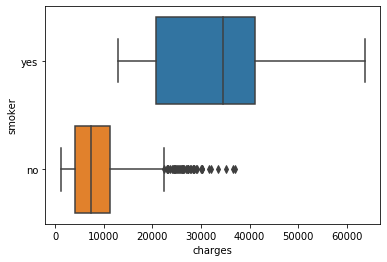

In [17]:
sns.boxplot(x=insurance_df["charges"],y=insurance_df["smoker"])

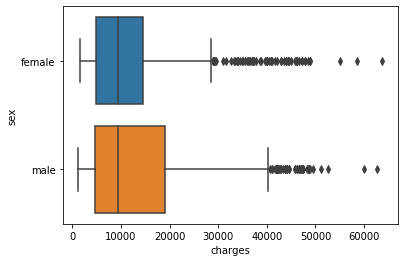

In [18]:
sns.boxplot(x=insurance_df["charges"],y=insurance_df["sex"])

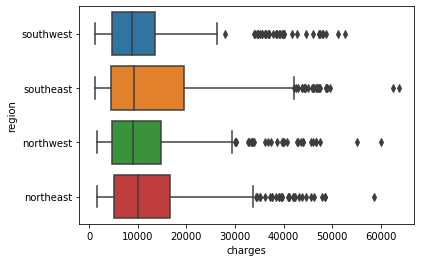

In [19]:
sns.boxplot(x=insurance_df["charges"],y=insurance_df["region"])

## data distribution of "bmi", "age" and "charges"

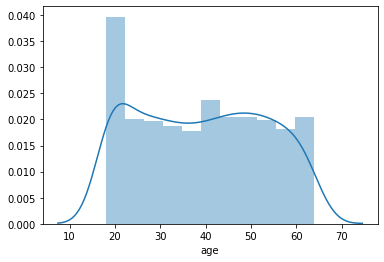

In [20]:
sns.distplot(insurance_df['age'])

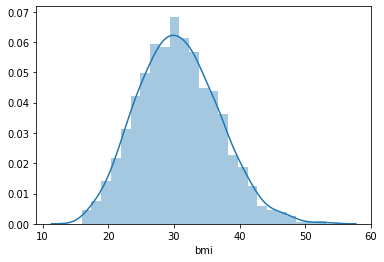

In [21]:
sns.distplot(insurance_df['bmi'])

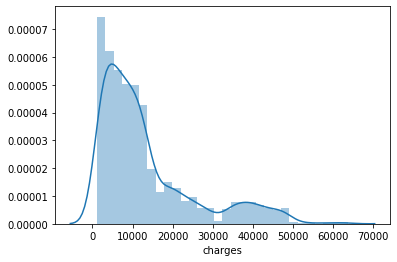

In [22]:
sns.distplot(insurance_df['charges'])

### Form boxplot and histogram it can be found that "charges" is not normally distributed, it is right skewed. "bmi" is normally distributed and "age" is not normally distributed, it follows at flat curve and skewness is not present in "age" column.

# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

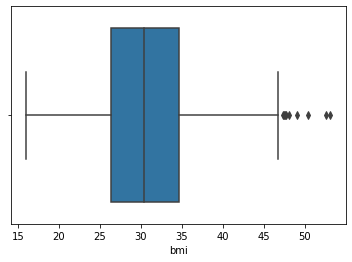

In [23]:
sns.boxplot(x=insurance_df["bmi"])

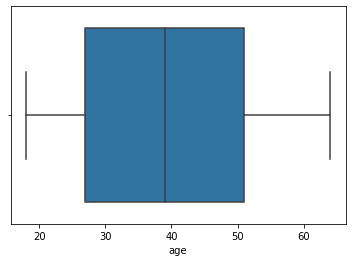

In [24]:
sns.boxplot(x=insurance_df["age"])

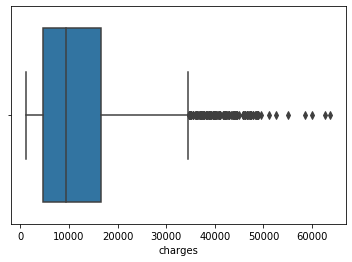

In [25]:
sns.boxplot(x=insurance_df["charges"])

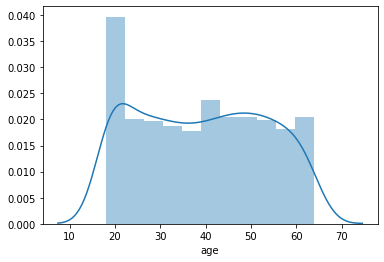

In [26]:
sns.distplot(insurance_df['age'])

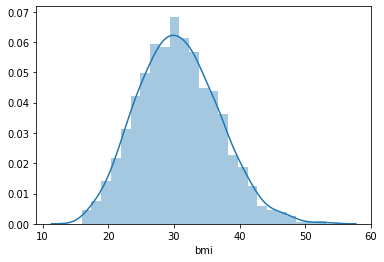

In [27]:
sns.distplot(insurance_df['bmi'])

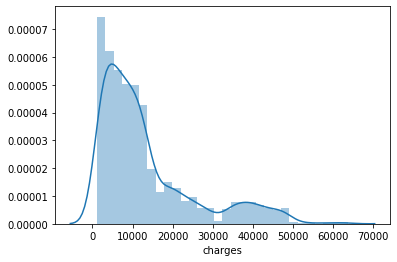

In [28]:
sns.distplot(insurance_df['charges'])

### Form boxplot and histogram we can see that skewness is present in "charges" attribute

# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [29]:
Q1 = insurance_df.quantile(0.25)
Q3 = insurance_df.quantile(0.75)
IQR = Q3 - Q1
print("IQR:")
print(IQR)

IQR:
age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [30]:
columns = ['bmi', 'age', 'charges']
for col in columns:
    Outlier = insurance_df[(insurance_df[col] < (Q1[col] - 1.5*IQR[col])) | (insurance_df[col] > (Q3[col] + 1.5*IQR[col]))]
    if len(Outlier) > 0:
        print("Outlier is present in: {}".format(col))

Outlier is present in: bmi
Outlier is present in: charges


In [31]:
print("Outlier data:")
Outlier

Outlier data:


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


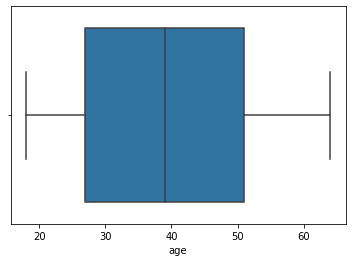

In [32]:
sns.boxplot(insurance_df['age'])

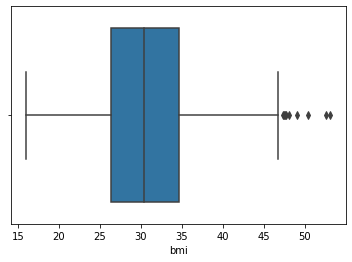

In [33]:
sns.boxplot(insurance_df['bmi'])

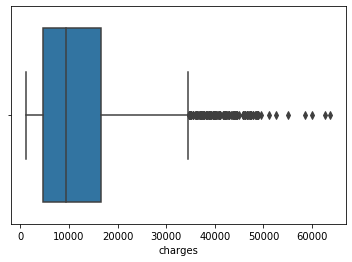

In [34]:
sns.boxplot(insurance_df['charges'])

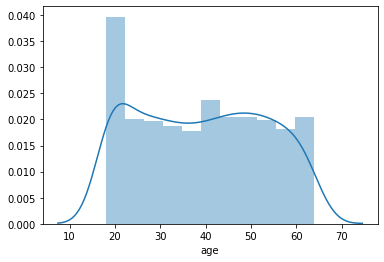

In [35]:
sns.distplot(insurance_df['age'])

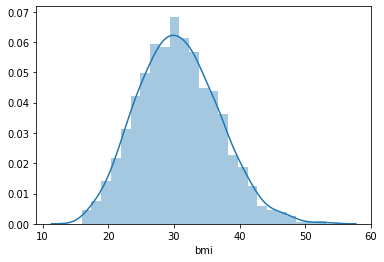

In [36]:
sns.distplot(insurance_df['bmi'])

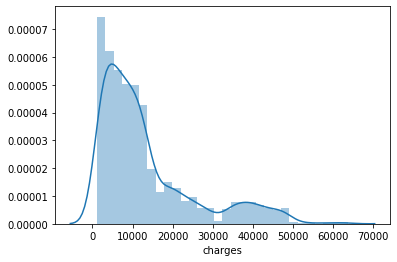

In [37]:
sns.distplot(insurance_df['charges'])

From IRQ ranges calculation, boxplot and histogram representation it is evident that outlier is present in "bmi" and "charges" attribute.

# h. Distribution of categorical columns (include children)

In [38]:
categoricalAttrib = insurance_df.select_dtypes(include='object')
categoricalAttrib.columns

Index(['sex', 'smoker', 'region'], dtype='object')

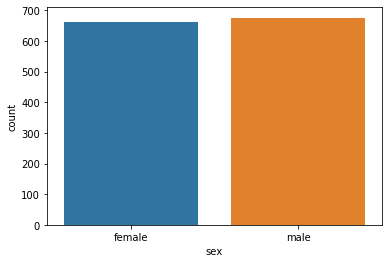

In [39]:
sns.countplot(insurance_df["sex"])

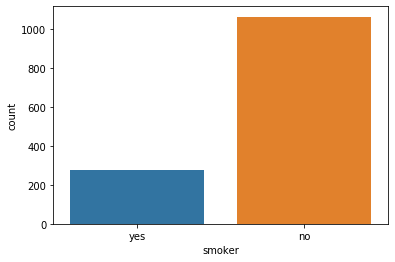

In [40]:
sns.countplot(insurance_df["smoker"])

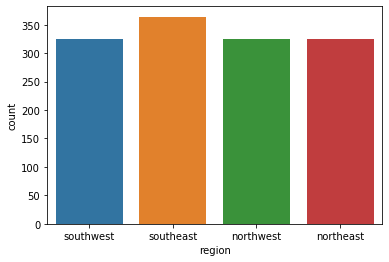

In [41]:
sns.countplot(insurance_df["region"])

# In this dataset 3 categorical variable is present 'sex', 'smoker' and 'region'.
**"sex" : is balanced**

**"smoker" : is imbalanced**

**"region" : is balanced**

# i. Pair plot that includes all the columns of the data frame

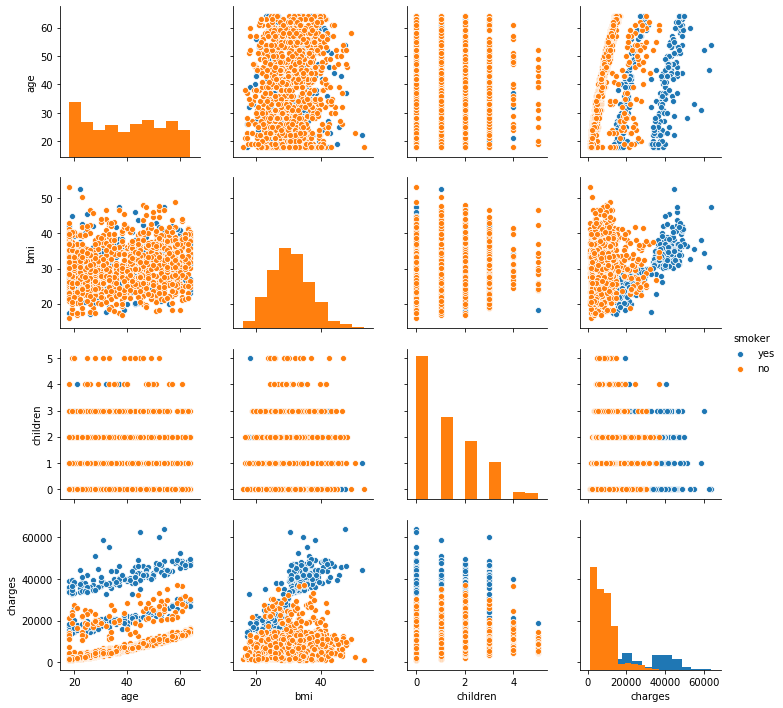

In [42]:
sns.pairplot(insurance_df, hue="smoker", diag_kind="hist")

### Medical bill cost by health insurance is higher for smokers.

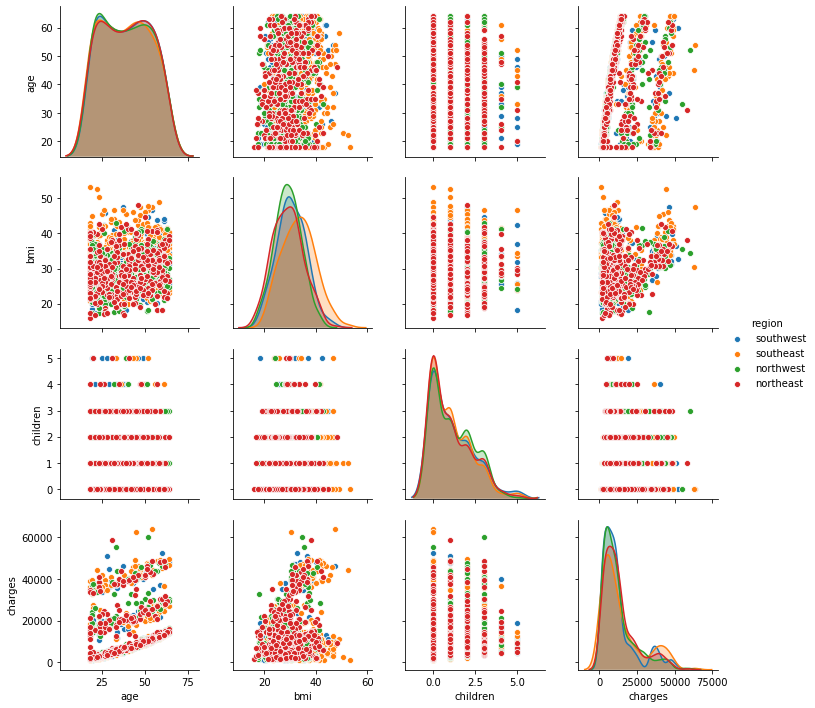

In [43]:
sns.pairplot(insurance_df, hue="region")

### Mean of Medical bill cost are in similar range across all four regions. 

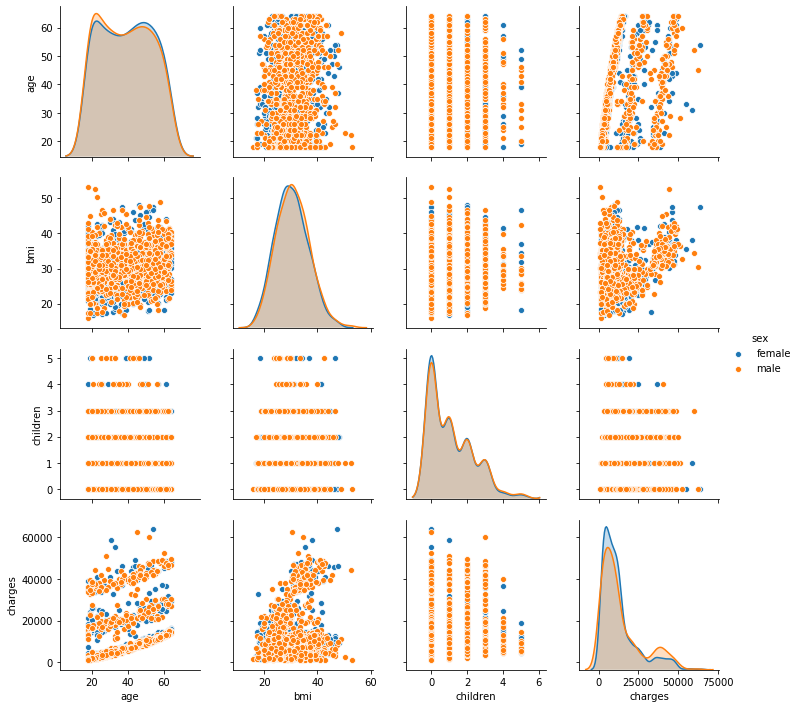

In [44]:
sns.pairplot(insurance_df, hue="sex")

### Medical bill cost by health insurance is higher for male as compare to female.

# 4. Answer the following questions with statistical evidence.

# a. Do charges of people who smoke differ significantly from the people who don't?

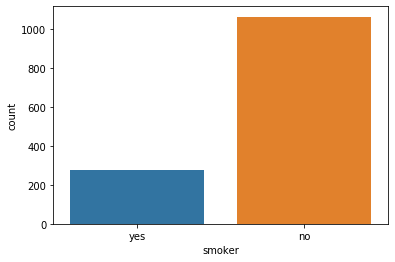

In [45]:
sns.countplot(insurance_df["smoker"])

In [46]:
insurance_df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

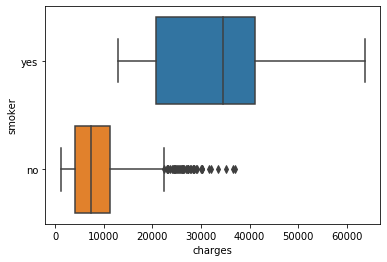

In [47]:
sns.boxplot(x=insurance_df["charges"],y=insurance_df["smoker"])

In [48]:
print("Minimun charges for smokers {}".format(insurance_df[insurance_df["smoker"] == 'yes']['charges'].min()))
print("Maximum charges for smokers {}".format(insurance_df[insurance_df["smoker"] == 'yes']['charges'].max()))
print("Mean charges for smokers {}".format(insurance_df[insurance_df["smoker"] == 'yes']['charges'].mean()))

Minimun charges for smokers 12829.4551
Maximum charges for smokers 63770.42801
Mean charges for smokers 32050.23183153285


In [49]:
print("Minimum charges for non-smokers {}".format(insurance_df[insurance_df["smoker"] == 'no']['charges'].min()))
print("Maximum charges for non-smokers {}".format(insurance_df[insurance_df["smoker"] == 'no']['charges'].max()))
print("Mean charges for non-smokers {}".format(insurance_df[insurance_df["smoker"] == 'no']['charges'].mean()))

Minimum charges for non-smokers 1121.8739
Maximum charges for non-smokers 36910.60803
Mean charges for non-smokers 8434.268297856199


From above boxplot and min, max and mean value for smokers and non smoker its found that their is significant difference in charges. Number of smokers are less compare to non smokers but still mean charges is more for people how smokes. 

Charges is higher for smokers and significantly different.

# b. Does bmi of males differ significantly from that of females?

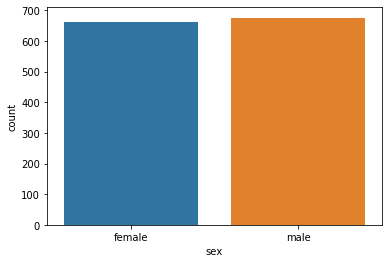

In [50]:
sns.countplot(insurance_df["sex"])

In [51]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

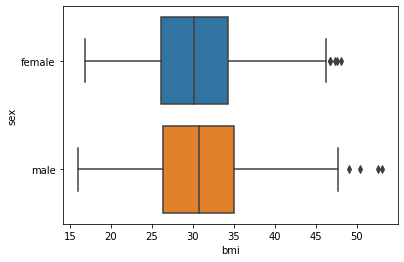

In [52]:
sns.boxplot(x=insurance_df["bmi"],y=insurance_df["sex"])

In [53]:
print("Minimun BMI for male {}".format(insurance_df[insurance_df["sex"] == 'male']['bmi'].min()))
print("Maximum BMI for male {}".format(insurance_df[insurance_df["sex"] == 'male']['bmi'].max()))
print("Mean BMI for male {}".format(insurance_df[insurance_df["sex"] == 'male']['bmi'].mean()))

Minimun BMI for male 15.96
Maximum BMI for male 53.13
Mean BMI for male 30.943128698224832


In [54]:
print("Minimun BMI for female {}".format(insurance_df[insurance_df["sex"] == 'female']['bmi'].min()))
print("Maximum BMI for female {}".format(insurance_df[insurance_df["sex"] == 'female']['bmi'].max()))
print("Mean BMI for female {}".format(insurance_df[insurance_df["sex"] == 'female']['bmi'].mean()))

Minimun BMI for female 16.815
Maximum BMI for female 48.07
Mean BMI for female 30.377749244713023


In [55]:
male_df = insurance_df[insurance_df["sex"] == 'male']
female_df = insurance_df[insurance_df["sex"] == 'female']

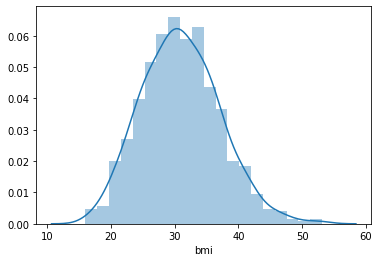

In [56]:
sns.distplot(male_df['bmi'])

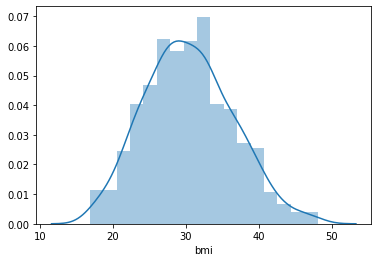

In [57]:
sns.distplot(female_df['bmi'])

Number of male and female is very close, and bmi is normally distributed for both male and female.

From boxplot and statistic min, max and mean of bim for both male and female are very close. Hence their is no significant difference between male bmi and female bmi.

# c. Is the proportion of smokers significantly different in different genders?

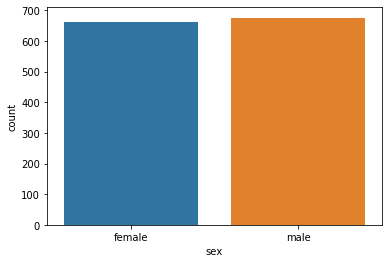

In [58]:
sns.countplot(insurance_df["sex"])

In [59]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [60]:
# Find number of smokers in male
MaleSmoker = insurance_df[(insurance_df["sex"] == 'male') & (insurance_df['smoker'] == 'yes')]

In [61]:
print("Number of male smoker: {}".format(MaleSmoker.shape[0]))
print("Male smoker: {} %".format((159/676)*100))

Number of male smoker: 159
Male smoker: 23.5207100591716 %


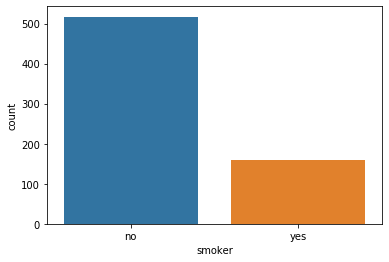

In [62]:
# Plot male smokers and non-smokers
sns.countplot(insurance_df[insurance_df["sex"]=='male']['smoker'])

In [63]:
FemaleSmoker = insurance_df[(insurance_df["sex"] == 'female') & (insurance_df['smoker'] == 'yes')]

In [64]:
print("Number of female smokers: {}".format(FemaleSmoker.shape[0]))
print("Female smoke: {} %".format((115/662)*100))

Number of female smokers: 115
Female smoke: 17.371601208459214 %


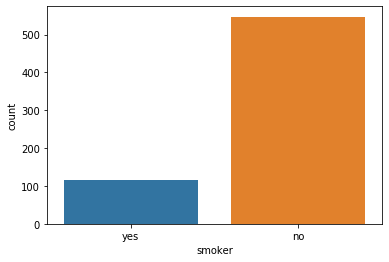

In [65]:
# Plot female smokers and non-smokers
sns.countplot(insurance_df[insurance_df["sex"]=='female']['smoker'])

Number of male and female are in similar range, it is balanced data. 23% of male are smokers and 17% female are smokers. Male percentage is higher and significantly different.

# d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [66]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [67]:
children0 = insurance_df[(insurance_df['children'] == 0) & (insurance_df['sex'] =='female')]
children1 = insurance_df[(insurance_df['children'] == 1) & (insurance_df['sex'] =='female')]
children2 = insurance_df[(insurance_df['children'] == 2) & (insurance_df['sex'] =='female')]

In [68]:
print("Number of woman with no children: {}".format(children0.shape[0]))
print("Number of woman with one children: {}".format(children1.shape[0]))
print("Number of woman with two children: {}".format(children2.shape[0]))

Number of woman with no children: 289
Number of woman with one children: 158
Number of woman with two children: 119


BMI Distribution for woman having no child


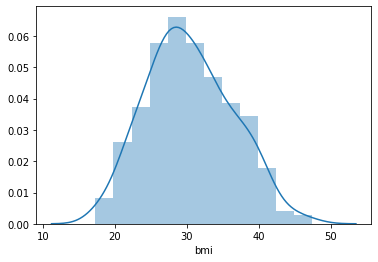

In [69]:
# BMI Distribution for woman having no child
print("BMI Distribution for woman having no child")
sns.distplot(insurance_df[(insurance_df['children'] == 0) & (insurance_df['sex'] =='female')]['bmi'])

In [70]:
print("MIN BMI for woman with no child: {}".format(insurance_df[(insurance_df['children'] == 0) & 
                                                                (insurance_df['sex'] =='female')]['bmi'].min()))

print("MAX BMI for woman with no child: {}".format(insurance_df[(insurance_df['children'] == 0) & 
                                                                 (insurance_df['sex'] =='female')]['bmi'].max()))

print("Mean BMI for woman with no child: {}".format(insurance_df[(insurance_df['children'] == 0) & 
                                                                 (insurance_df['sex'] =='female')]['bmi'].mean()))

MIN BMI for woman with no child: 17.29
MAX BMI for woman with no child: 47.41
Mean BMI for woman with no child: 30.361522491349486


BMI Distribution for woman having one child


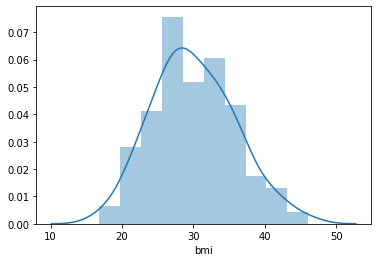

In [71]:
# BMI Distribution for woman having one child
print("BMI Distribution for woman having one child")
sns.distplot(insurance_df[(insurance_df['children'] == 1) & (insurance_df['sex'] =='female')]['bmi'])

In [72]:
print("MIN BMI for woman with one child: {}".format(insurance_df[(insurance_df['children'] == 1) & 
                                                                (insurance_df['sex'] =='female')]['bmi'].min()))

print("MAX BMI for woman with one child: {}".format(insurance_df[(insurance_df['children'] == 1) & 
                                                                 (insurance_df['sex'] =='female')]['bmi'].max()))

print("Mean BMI for woman with one child: {}".format(insurance_df[(insurance_df['children'] == 1) & 
                                                                 (insurance_df['sex'] =='female')]['bmi'].mean()))

MIN BMI for woman with one child: 16.815
MAX BMI for woman with one child: 46.09
Mean BMI for woman with one child: 30.05265822784811


BMI Distribution for woman having two child


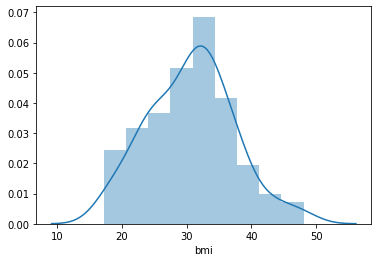

In [73]:
# BMI Distribution for woman having two child
print("BMI Distribution for woman having two child")
sns.distplot(insurance_df[(insurance_df['children'] == 2) & (insurance_df['sex'] =='female')]['bmi'])

In [74]:
print("MIN BMI for woman with two child: {}".format(insurance_df[(insurance_df['children'] == 2) & 
                                                                (insurance_df['sex'] =='female')]['bmi'].min()))

print("MAX BMI for woman with two child: {}".format(insurance_df[(insurance_df['children'] == 2) & 
                                                                 (insurance_df['sex'] =='female')]['bmi'].max()))

print("Mean BMI for woman with two child: {}".format(insurance_df[(insurance_df['children'] == 2) & 
                                                                 (insurance_df['sex'] =='female')]['bmi'].mean()))

MIN BMI for woman with two child: 17.195
MAX BMI for woman with two child: 48.07
Mean BMI for woman with two child: 30.64978991596637


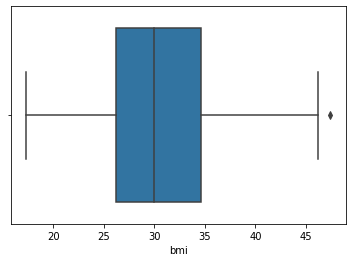

In [75]:
sns.boxplot(children0['bmi'])

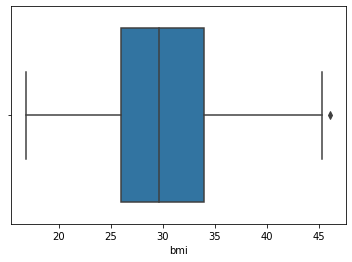

In [76]:
sns.boxplot(children1['bmi'])

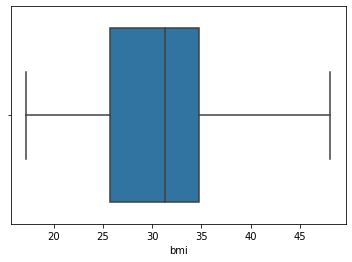

In [77]:
sns.boxplot(children2['bmi'])

From min, max and mean bmi statistic and from boxplot it can be seen that bmi distribution for woman having no child, one child and two child are same. And histogram plot also shows that bmi is normally distributed, no skewness is present.